In [28]:
import warnings
warnings.filterwarnings('ignore')


In [29]:
# from google.colab import drive
# drive.mount('/content/drive')

In [30]:
# utilities ok
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
# from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px

# Libraries for text preprocessing.
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
import pandas as pd


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michalkielkowski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michalkielkowski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/michalkielkowski/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
# Importing the dataset
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
# !gdown 1oyDLRXPTN3vtaStHGY8q_yCcBc5-i68j
dataset = pd.read_csv('/Users/michalkielkowski/Desktop/infa-all/magisterka/eksploracja_danych/Twitter_Sentiment_Analysis/data/training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING , names=DATASET_COLUMNS)
dataset.head(20)

# mozna pomyslec i zrobic wizualizacje od słow zaczynających sie na @ i sprawidzć co jest najpoualrniejsze i jeszcze można po #


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


<Figure size 1000x600 with 0 Axes>

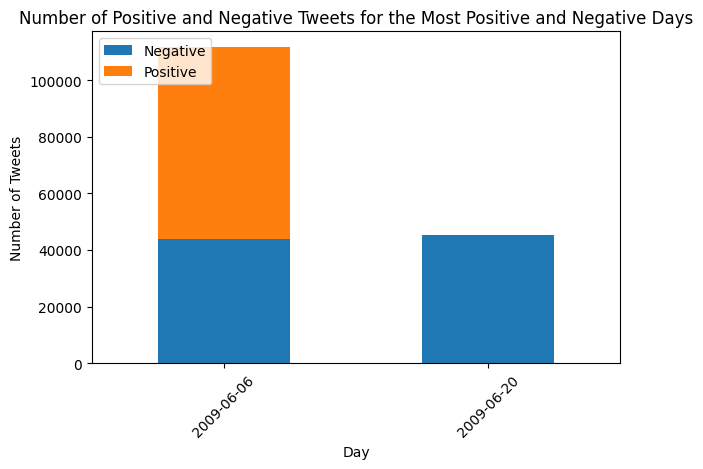

In [32]:

# Convert 'date' column to datetime format
dataset['date'] = pd.to_datetime(dataset['date'], infer_datetime_format=True)

# Extract the day
dataset['day'] = dataset['date'].dt.date

# Group by day and sentiment, count the number of positive and negative tweets
daily_sentiment_counts = dataset.groupby(['day', 'target']).size().unstack(fill_value=0)

# Find the day with the most positive and negative tweets
most_positive_day = daily_sentiment_counts[4].idxmax()
most_negative_day = daily_sentiment_counts[0].idxmax()

# Filter the dataset to include only the most positive and most negative days
filtered_data = dataset[(dataset['day'] == most_positive_day) | (dataset['day'] == most_negative_day)]
filtered_sentiment_counts = filtered_data.groupby(['day', 'target']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
filtered_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Number of Positive and Negative Tweets for the Most Positive and Negative Days')
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.legend(['Negative', 'Positive'], loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
dataset.head(20)

,target,ids,date,flag,user,text,day
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06
5,0,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009-04-06
6,0,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,Need a hug,2009-04-06
7,0,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,2009-04-06
8,0,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,2009-04-06
9,0,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,@twittera que me muera ?,2009-04-06


In [34]:
dataset.tail(20)

,target,ids,date,flag,user,text,day
1599980,4,2193578679,2009-06-16 08:38:56,NO_QUERY,puchal_ek,@myheartandmind jo jen by nemuselo zrovna tÃ© ...,2009-06-16
1599981,4,2193578716,2009-06-16 08:38:57,NO_QUERY,youtubelatest,Another Commenting Contest! [;: Yay!!! http:/...,2009-06-16
1599982,4,2193578739,2009-06-16 08:38:57,NO_QUERY,Mandi_Davenport,@thrillmesoon i figured out how to see my twee...,2009-06-16
1599983,4,2193578758,2009-06-16 08:38:57,NO_QUERY,xoAurixo,"@oxhot theri tomorrow, drinking coffee, talkin...",2009-06-16
1599984,4,2193578847,2009-06-16 08:38:57,NO_QUERY,RobFoxKerr,You heard it here first -- We're having a girl...,2009-06-16
1599985,4,2193578982,2009-06-16 08:38:58,NO_QUERY,LISKFEST,"if ur the lead singer in a band, beware fallin...",2009-06-16
1599986,4,2193579087,2009-06-16 08:38:58,NO_QUERY,marhgil,@tarayqueen too much ads on my blog.,2009-06-16
1599987,4,2193579092,2009-06-16 08:38:58,NO_QUERY,cathriiin,@La_r_a NEVEER I think that you both will get...,2009-06-16
1599988,4,2193579191,2009-06-16 08:38:59,NO_QUERY,tellman,@Roy_Everitt ha- good job. that's right - we g...,2009-06-16
1599989,4,2193579211,2009-06-16 08:38:59,NO_QUERY,jazzstixx,@Ms_Hip_Hop im glad ur doing well,2009-06-16


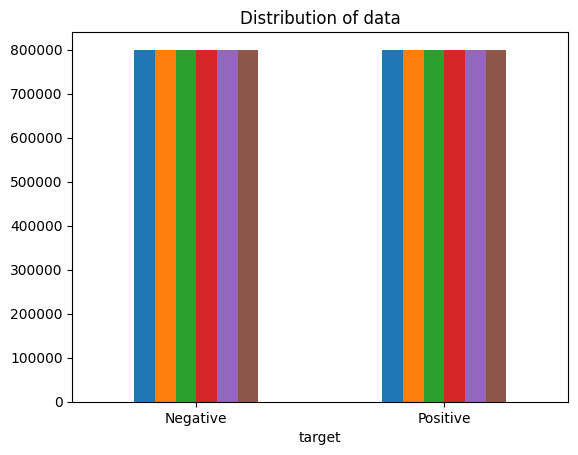

In [35]:
# Replacing the values to ease understanding.
dataset['target'] = dataset['target'].replace(4,1)

# Plotting the distribution for dataset.
ax = dataset.groupby('target').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['target'])

In [36]:
target_df = dataset['target'].value_counts().reset_index()
fig = px.pie(target_df, values='count', names='target',title='Target Distribution')
fig.show()

In [37]:
months_data = {
  "May": 0,
  "Apr": 0,
  "Jun": 0
}

# Assuming dataset['date'] is a column in your pandas DataFrame
for date in dataset['date']:
    # Extract the month using the dt accessor
    month = date.month_name()[:3]  # Get the first three letters of the month name
    
    # Increment the count for the corresponding month
    if month == 'Apr':
        months_data['Apr'] += 1
    elif month == 'May':
        months_data['May'] += 1
    elif month == 'Jun':
        months_data['Jun'] += 1


In [38]:
print(months_data['Apr'])
print(months_data['May'])
print(months_data['Jun'])

100025
576367
923608


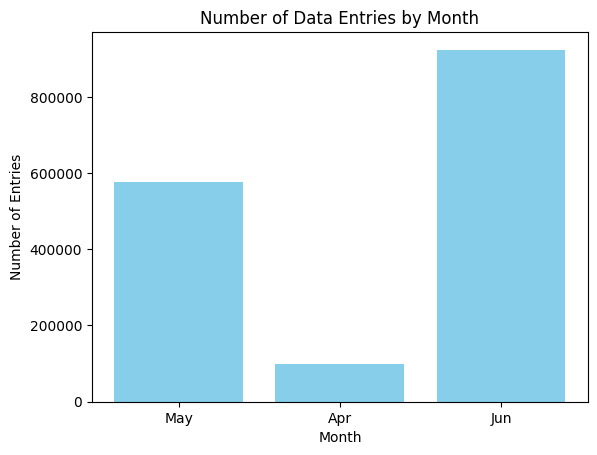

In [39]:

months = list(months_data.keys())
counts = list(months_data.values())

# Creating the bar graph
plt.bar(months, counts, color='skyblue')

# Adding titles and labels
plt.title('Number of Data Entries by Month')
plt.xlabel('Month')
plt.ylabel('Number of Entries')

# Display the graph
plt.show()

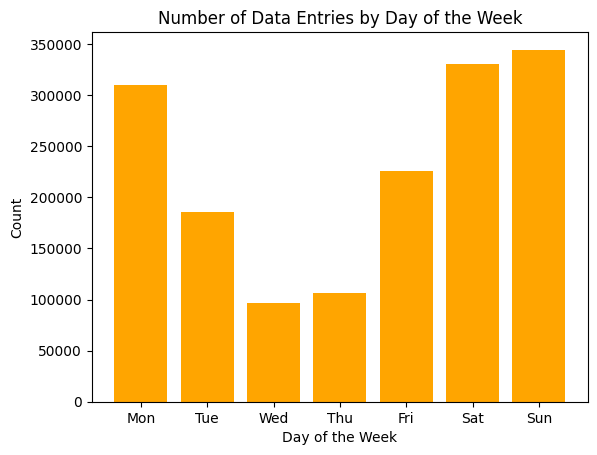

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset['date'] is a column in your pandas DataFrame
# and it contains Timestamp objects
days_data = {
  "Mon": 0,
  "Tue": 0,
  "Wed": 0,
  "Thu": 0,
  "Fri": 0,
  "Sat": 0,
  "Sun": 0,
}

for date in dataset['date']:
    # Extract the day of the week using the dt accessor
    day_of_week = date.day_name()[:3]  # Get the first three letters of the day name
    
    # Increment the count for the corresponding day of the week
    days_data[day_of_week] += 1

# Plotting the distribution of days of the week
plt.bar(days_data.keys(), days_data.values(), color='orange')
plt.title('Number of Data Entries by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


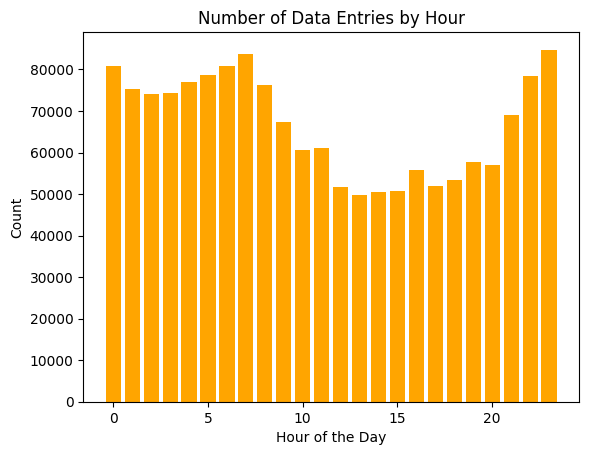

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset is your DataFrame containing the date column
hours_data = {}

# Extract hour from each date using pandas
hours_series = pd.to_datetime(dataset['date']).dt.hour

# Count occurrences of each hour
for hour in hours_series:
    if hour in hours_data:
        hours_data[hour] += 1
    else:
        hours_data[hour] = 1

# Sort dictionary by keys (hours)
hours_data = dict(sorted(hours_data.items()))

# Plotting the distribution of hours
plt.bar(hours_data.keys(), hours_data.values(), color='orange')
plt.title('Number of Data Entries by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


In [42]:
df = pd.read_csv('/Users/michalkielkowski/Desktop/infa-all/magisterka/eksploracja_danych/Twitter_Sentiment_Analysis/data/training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

In [43]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [44]:
df.target = df.target.apply(lambda x: decode_sentiment(x))


In [45]:
# Some basic helper functions to clean text by removing urls, emojis, html tags and punctuations.

import os
stop = set(stopwords.words('english'))

# Core packages for text processing.
import string
import re

def remove_stopwords(text):
    tokens = []
    for token in text.split():
        if token not in stop:
            tokens.append(token)
    return " ".join(tokens)


def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions
df['text_clean'] = df['text'].apply(lambda x: remove_stopwords(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_URL(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_html(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_punct(x))

In [46]:
# Creating a new feature for the visualization.
# For customizing our plots.
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

df['Character Count'] = df['text_clean'].apply(lambda x: len(str(x)))


def plot_dist3(df_x, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df_x.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(x=feature, data=df, orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=25))

    plt.suptitle(f'{title}', fontsize=24)

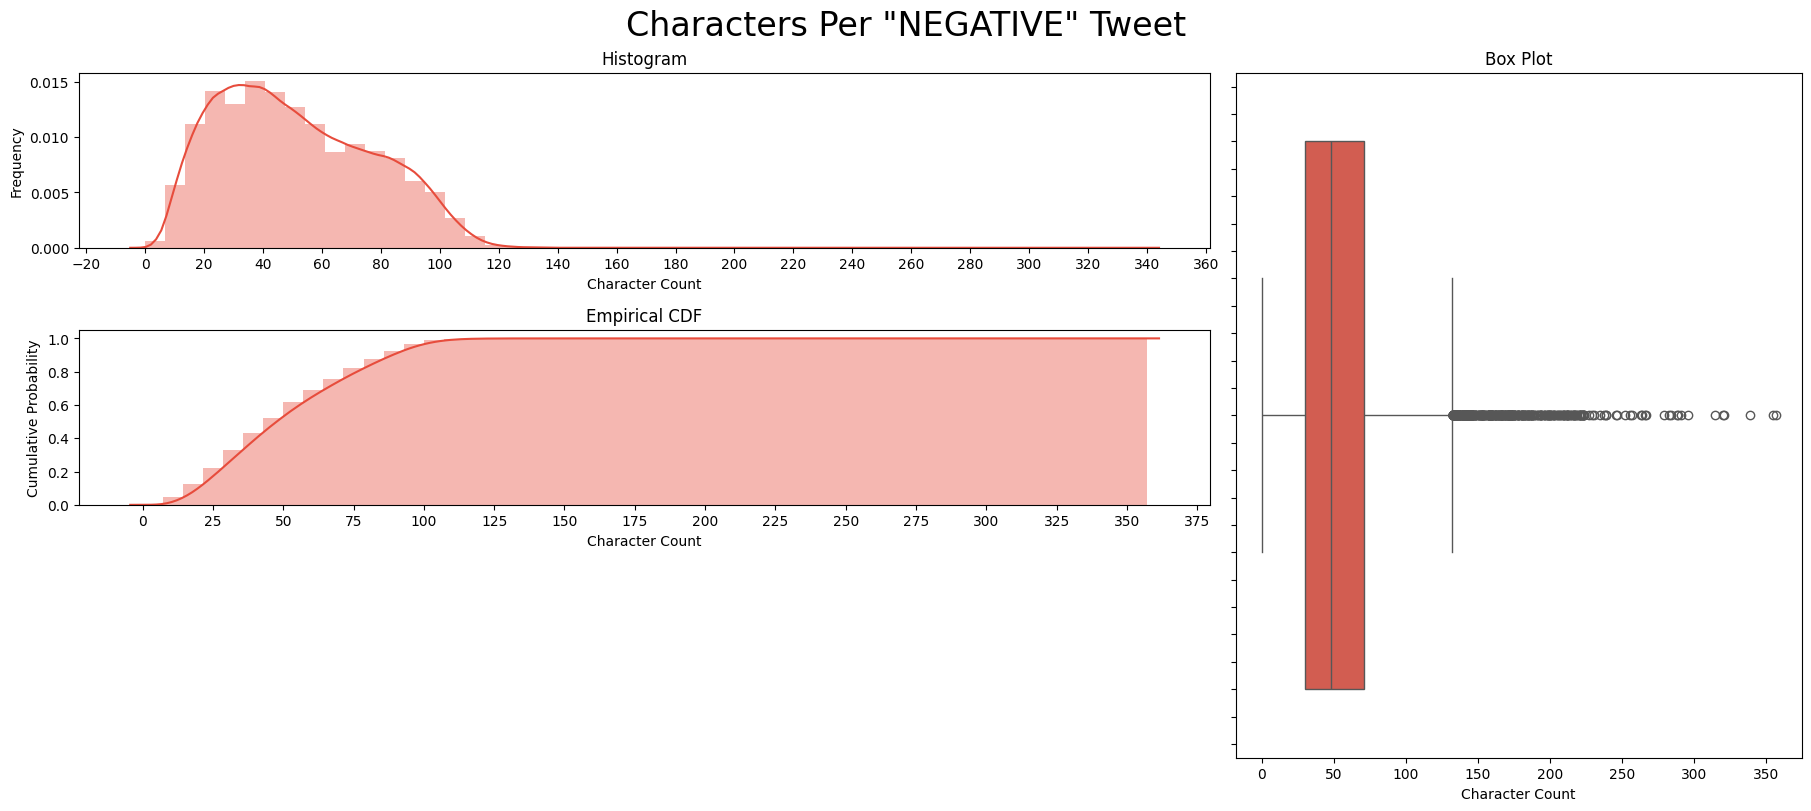

In [47]:
plot_dist3(df[df['target'] == 'NEGATIVE'], 'Character Count',
           'Characters Per "NEGATIVE" Tweet')

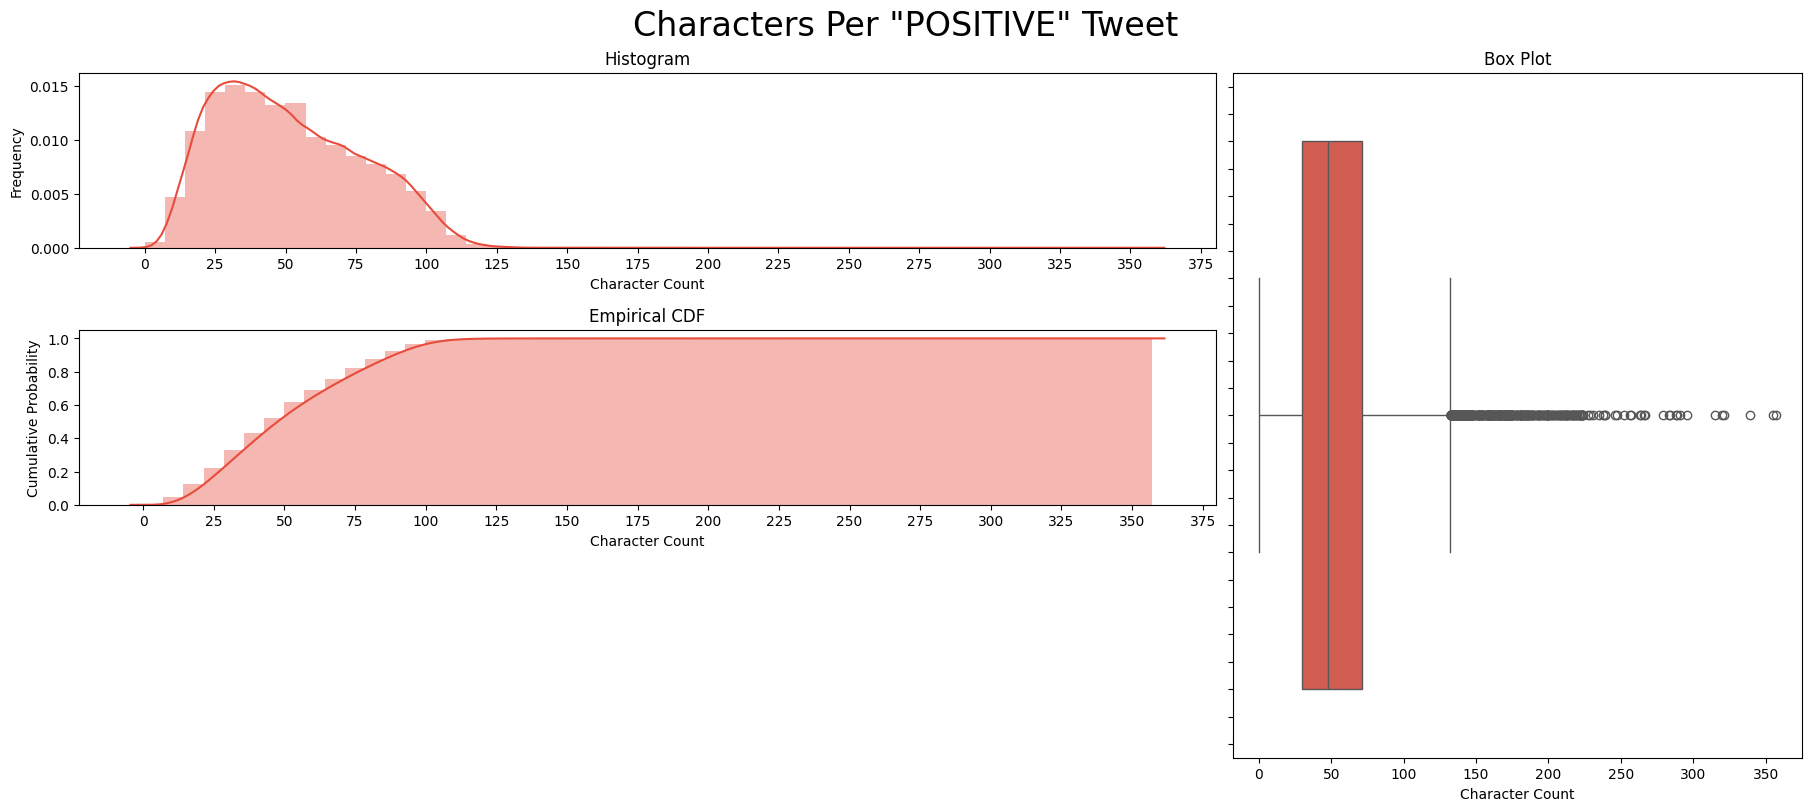

In [48]:
plot_dist3(df[df['target'] == "POSITIVE"], 'Character Count',
           'Characters Per "POSITIVE" Tweet')

In [49]:
data1 = pd.read_csv('/Users/michalkielkowski/Desktop/infa-all/magisterka/eksploracja_danych/Twitter_Sentiment_Analysis/data/training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

In [50]:
data1['target'] = data1['target'].replace(4,1)


In [51]:
# get a word count per of text
def word_count(words):
    return len(words.split())

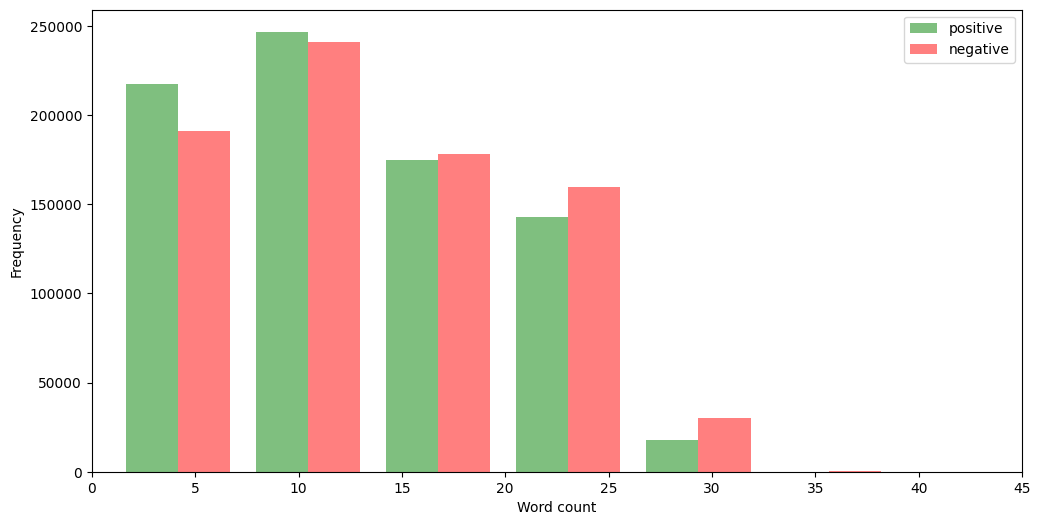

In [52]:
# plot word count distribution for both positive and negative 

data1['word count'] = data1['text'].apply(word_count)
p = data1['word count'][data1.target == 1]
n = data1['word count'][data1.target == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [53]:
DATASET_COLUMNS2 = ["sentiment", "ids", "date", "flag", "user", "text"]


In [54]:
data2 = pd.read_csv('/Users/michalkielkowski/Desktop/infa-all/magisterka/eksploracja_danych/Twitter_Sentiment_Analysis/data/training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING , names=DATASET_COLUMNS2)


In [55]:
# mapping sentiment data to classes 0 and 4 and convert 4 to 1 to be more intutive

from sklearn.utils import shuffle


data2 = pd.concat([data2.query("sentiment==0"), data2.query("sentiment==4")])
data2.sentiment = data2.sentiment.map({0:0, 4:1})
data2 =  shuffle(data2).reset_index(drop=True)

<Axes: xlabel='user'>

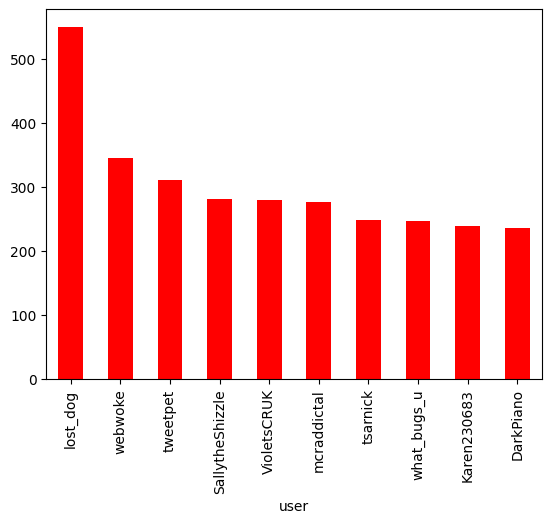

In [56]:
users = data2['user'].value_counts()[:10]
users.plot(kind='bar', color='red')

In [57]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michalkielkowski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
corpus = []

word = data2['text'].str.split()
new = word.values.tolist()
corpus=[word for i in new for word in i]

<BarContainer object of 14 artists>

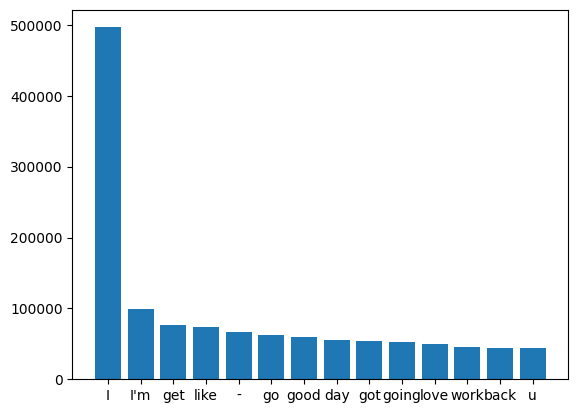

In [59]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common(100)

x, y= [], []
for word,count in most[:50]:
    # can avoid stop words too
    if word not in stop:
        x.append(word)
        y.append(count)
        
plt.bar(x,y)

In [60]:
import plotly.express as px

temp = pd.DataFrame(most)


fig = px.treemap(temp, path=[0], values=1,title='Tree of Most Common Tweeted words')
fig.show()